In [148]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow.keras as keras
from tensorflow.keras import layers, models
import sklearn as sk

In [40]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
x_train[0].shape

(28, 28)

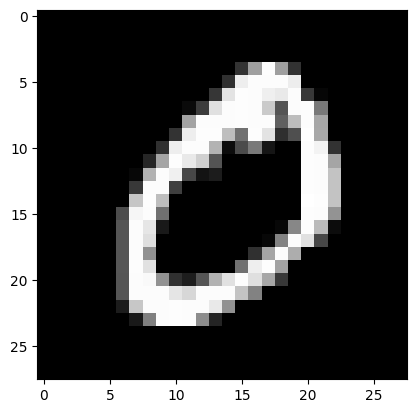

In [43]:
plt.imshow(x_train[1], cmap='gray')

In [17]:
y_train[1]

np.uint8(0)

scaling data

In [59]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255


scalling second option

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
x_train_scaled_min = scaler.fit_transform(x_train)
x_test_scaled_min = scaler.transform(x_test)


ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [61]:
x_train_reshaped = x_train_scaled.reshape(60000, 28*28)
x_test_reshaped = x_test_scaled.reshape(10000, 28*28)





In [81]:
x_train_reshaped.shape

(60000, 784)

In [82]:
x_test_reshaped.shape

(10000, 784)

Architecture Design

In [123]:
model=keras.Sequential([
    keras.layers.Dense(units=600, activation='relu',name='hidden_layer1',input_shape=(784,)),
    keras.layers.Dense(units=300,activation='relu',name='hidden_layer2'),
    keras.layers.Dense(units=10, activation='softmax', name='output_layer')])

In [115]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer1 (Dense)           │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,310 (2.50 MB)

 Trainable params: 654,310 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

compalling model

In [124]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Training Data

In [ ]:
#from tensorflow.keras.regularizers import l1, l2
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))


In [125]:
model.fit(x_train_reshaped, y_train, epochs=10,validation_data=(x_test_reshaped, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9041 - loss: 0.3134 - val_accuracy: 0.9675 - val_loss: 0.1035
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9760 - loss: 0.0770 - val_accuracy: 0.9766 - val_loss: 0.0752
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9833 - loss: 0.0520 - val_accuracy: 0.9664 - val_loss: 0.1128
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9886 - loss: 0.0368 - val_accuracy: 0.9778 - val_loss: 0.0830
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9797 - val_loss: 0.0773
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9926 - loss: 0.0231 - val_accuracy: 0.9795 - val_loss: 0.0824
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9799 - val_loss: 0.0861
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9940 - loss: 0

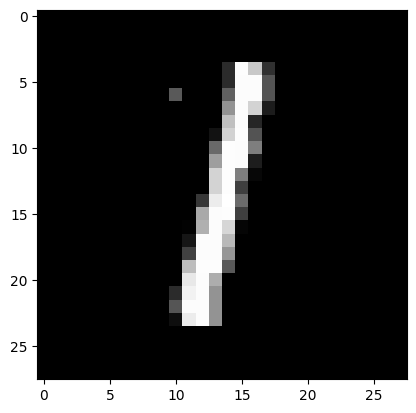

In [146]:
plt.imshow(x_test[6604], cmap='gray')

In [126]:

# Make predictions
predictions = model.predict(x_test_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_classes == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 98.20%


In [127]:

# Make predictions
predictions = model.predict(x_train_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_classes == y_train)
print(f'Accuracy: {accuracy * 100:.2f}%')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 99.75%


In [ ]:
model.predict(x_test_reshaped[10].reshape(1, 784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.0000000e+00, 3.0195322e-24, 8.1061011e-15, 1.3138654e-20,
        4.3537914e-14, 1.7994018e-18, 6.2536822e-14, 8.5631739e-18,
        5.3859901e-20, 6.4348609e-12]], dtype=float32)

In [143]:
output_10=model.predict(x_test_reshaped[6604].reshape(1, 784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [144]:
np.argmax(output_10)

np.int64(1)

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


TypeError: missing a required argument: 'y_pred'

In [157]:
print("Classification Report:"metrics.classification_report(predictions))

SyntaxError: invalid syntax (755866516.py, line 1)

In [160]:
final_train_predictions = np.argmax(model.predict(x_train_reshaped), axis=1)
final_test_predictions = np.argmax(model.predict(x_test_reshaped), axis=1)
print(classification_report(y_train, final_train_predictions))
print(classification_report(y_test, final_test_predictions))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99     